## Lecture 08
## Unsupervised Learning

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [8]:
### ```````````````````````
### import statements
###

import os
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects


In [9]:

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

## Helper Function

In [10]:
# Utility function to visulalise the outputs of PCA and t-SNE

def digit_scatter(x, labels):
    num_classes = len(np.unique(labels)) # choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_classes))
    fig, ax = plt.subplots(figsize =(6,6))
    sc = ax.scatter(x[:,0], x[:,1], s=15, c = palette[labels.astype(np.int16)], edgecolors='k')
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each digit corresponding to the label
    txts = []
    
    for i in range(num_classes):
        
        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20) # string placement at median points
        
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
        
        # txts.append(txt)
        
    return

# PCA

In [11]:
iris = load_iris()

features = iris.data

labels = iris.target

class_labels = np.unique(labels)
class_labels

array([0, 1, 2])

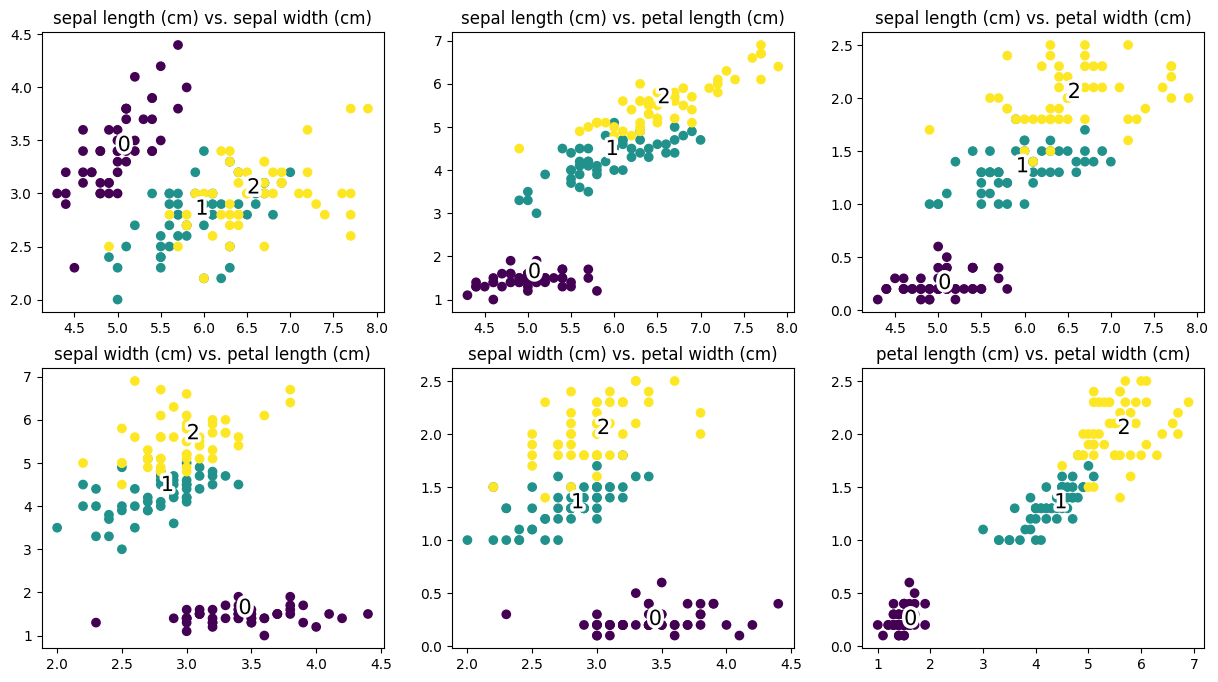

In [12]:
# Plot the features
kk = 1
plt.figure( figsize=(15, 8))
for ii in range (features.shape[1]-1):
    for jj in range(ii+1, (features.shape[1])):
        ax = plt.subplot(2, 3, kk)
        kk += 1
        ax.scatter( features [ :, ii], features [ :, jj], c = labels)
        
        for i in class_labels:
            # Position of each label at median of data points.
            xtext = np.median(features[labels == i ,ii], axis=0)
            ytext = np.median(features[labels == i, jj], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=15)
            txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
            
        ax.set_title('{} vs. {}'.format(iris.feature_names[ii], iris.feature_names[jj]))
        
        ax.axis('tight')
        
plt.show()

In [13]:
pca = PCA(n_components=2)

pca.fit(features)

PCA(n_components=2)

In [14]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [15]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [16]:
pca.explained_variance_ratio_.sum()

0.977685206318798

In [17]:
1 - pca.explained_variance_ratio_.sum()

0.02231479368120204

In [18]:
features_pca = pca.transform(features)

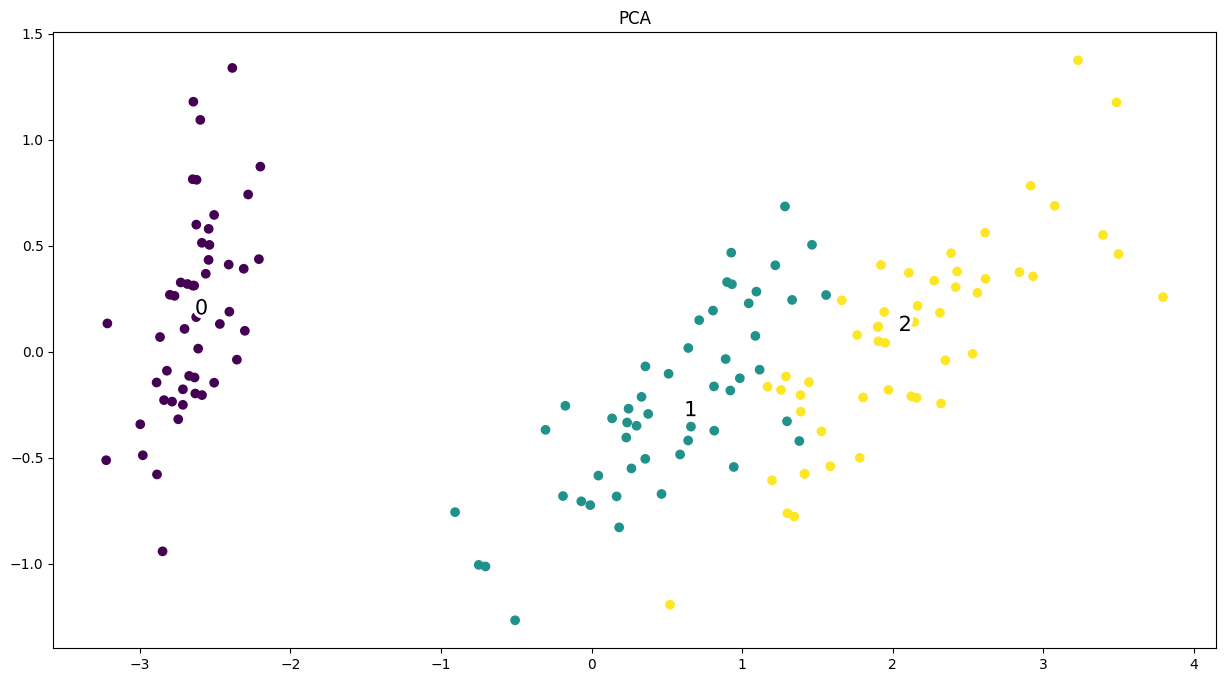

In [19]:
# Plot the features
fig, ax = plt.subplots( figsize = (15, 8) )
ax.scatter( features_pca [ :, 0], features_pca [ :, 1], c = labels)

for i in class_labels:
    # Position of each label at median of data points.
    xtext = np.median(features_pca[labels == i, 0], axis=0)
    ytext = np.median(features_pca[labels == i, 1], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=15)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
    
ax.set_title('PCA')
ax.axis('tight')
plt.show()

In [20]:
print ("Mean = {:s}\n".format(str(np.round(features_pca.mean(axis=0), decimals=5))))

print ("Std Dev = {:s}\n".format(str(np.round(features_pca.std(axis=0), decimals=5))))

# Do they have any correlation??

print ("Corr Coef. = \n", (np.corrcoef(features_pca.T)))

Mean = [-0. -0.]

Std Dev = [2.0494  0.49097]

Corr Coef. = 
 [[1.00000000e+00 2.16111299e-14]
 [2.16111299e-14 1.00000000e+00]]


## Manifold Learning

In [21]:
digits = load_digits()

X, y = digits.data, digits.target

n_sample, n_features = X.shape

n_neighbors = 30

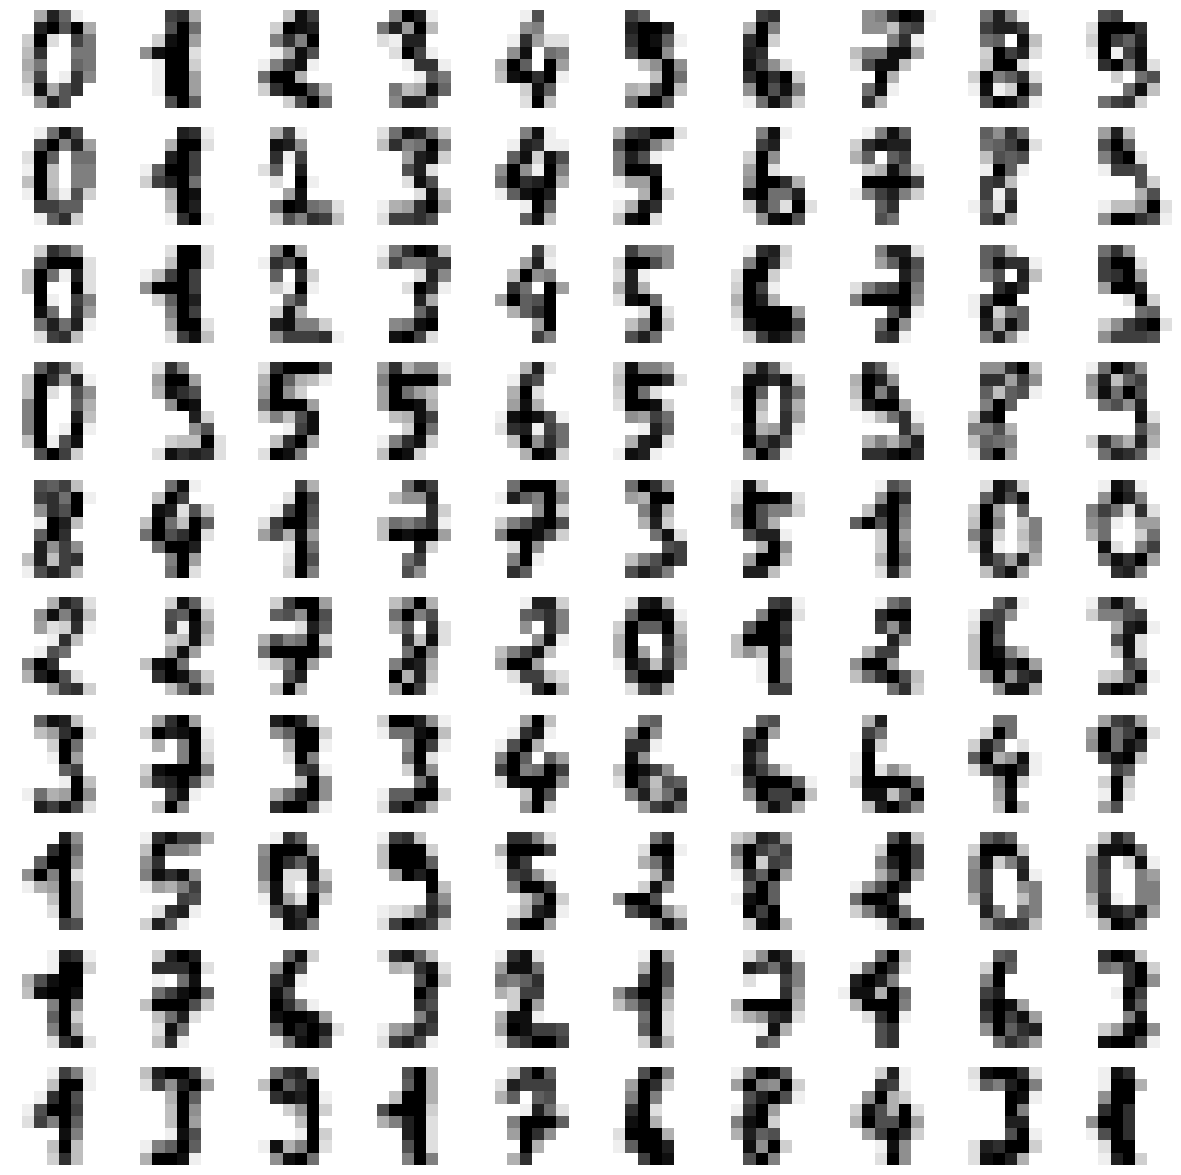

In [22]:
fig, axes = plt.subplots(10, 10 , figsize = (15, 15))

for idx, ax in enumerate(axes.ravel()):
    ax.imshow(X[idx].reshape((8,8)), cmap = plt.cm.binary)
    ax.axis('off')

In [23]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)


In [24]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled, y)

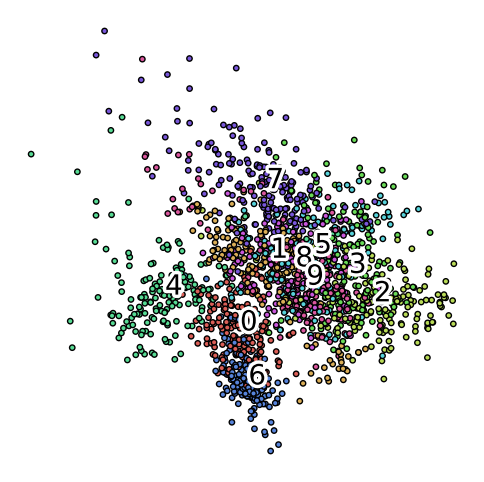

In [25]:
_ = digit_scatter(X_pca, y)

# LDA

In [26]:
lda = LinearDiscriminantAnalysis(n_components = 2)

data = X_scaled.copy()

data.flat[::X_scaled.shape[1]+1] += 0.01

projections = lda.fit_transform(data, y)

print (projections.shape)

(1797, 2)


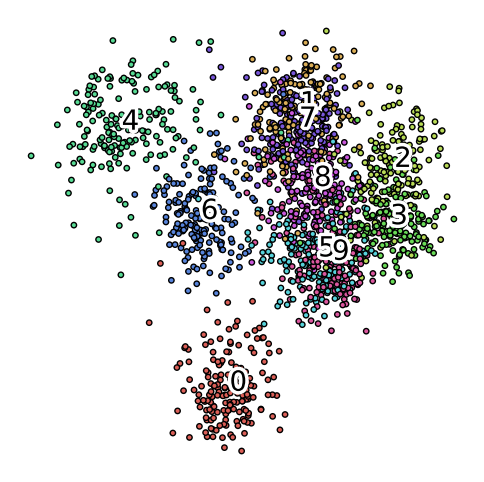

In [27]:
_ = digit_scatter(projections, y)

In [31]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=16,
    random_state=RANDOM_STATE,
)

projections = tsne.fit_transform(X_scaled, y)

print (projections.shape)

/home/dhpcsap/Desktop/AI/day_05/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(1797, 2)


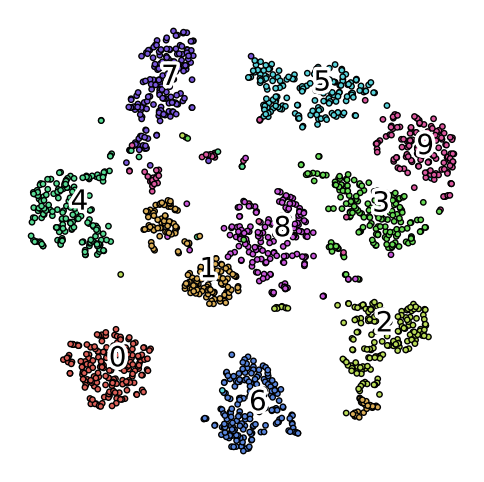

In [32]:
_ = digit_scatter(projections, y)

# KMeans  Clustering

In [33]:
from sklearn.cluster import KMeans

# Apply  PCA
pca = PCA ( n_components = 2 ) # reducing them to two components
features_pca = pca.fit_transform ( X )

kmeans = KMeans(n_clusters = 10, random_state = RANDOM_STATE ) # Note : we need to

kmeans.fit( features_pca )

print ("Centers :\n", np.round(kmeans.cluster_centers_, decimals = 2))

Centers :
 [[ 15.03 -13.64]
 [ -0.75   3.1 ]
 [-10.05  -9.42]
 [  7.09  17.26]
 [ -3.61  16.38]
 [  1.33 -21.75]
 [ 15.52   6.05]
 [-21.13  -8.26]
 [ 24.67  -3.73]
 [-14.7    6.26]]


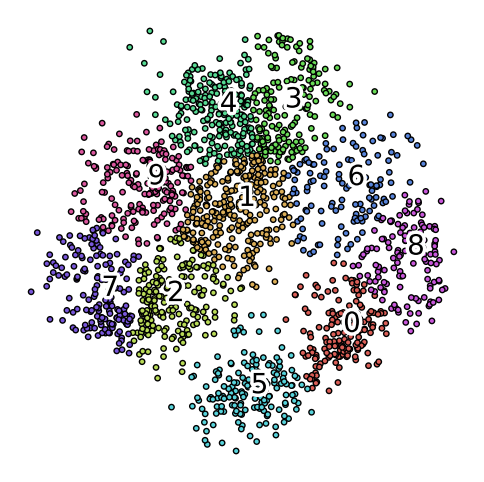

In [37]:
_ = digit_scatter(features_pca, kmeans.labels_)

## Univariate Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest, chi2

features_new = SelectKBest(chi2, k = 2).fit_transform(features, labels)

features_new.shape

(150, 2)

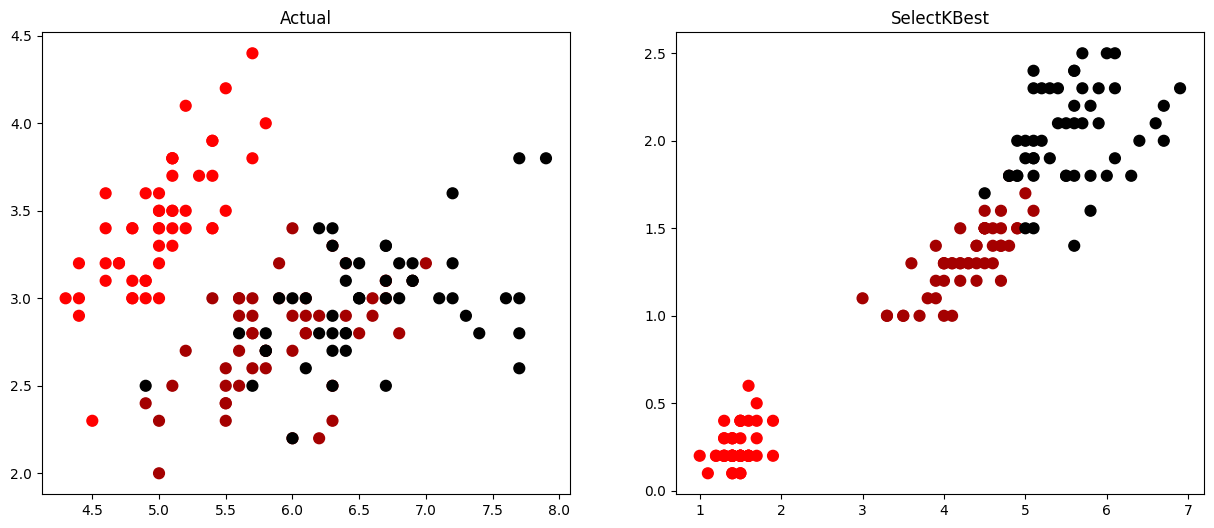

In [39]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
ax = axes[0]
ax.scatter( features [ :, 0], features [ :, 1], c = labels, cmap = plt.cm.flag, s = 60 )
ax.set_title('Actual')

ax = axes[1]
ax.scatter( features_new [ :,0], features_new [ :, 1], c = labels, cmap = plt.cm.flag, s = 60 )
ax.set_title('SelectKBest');

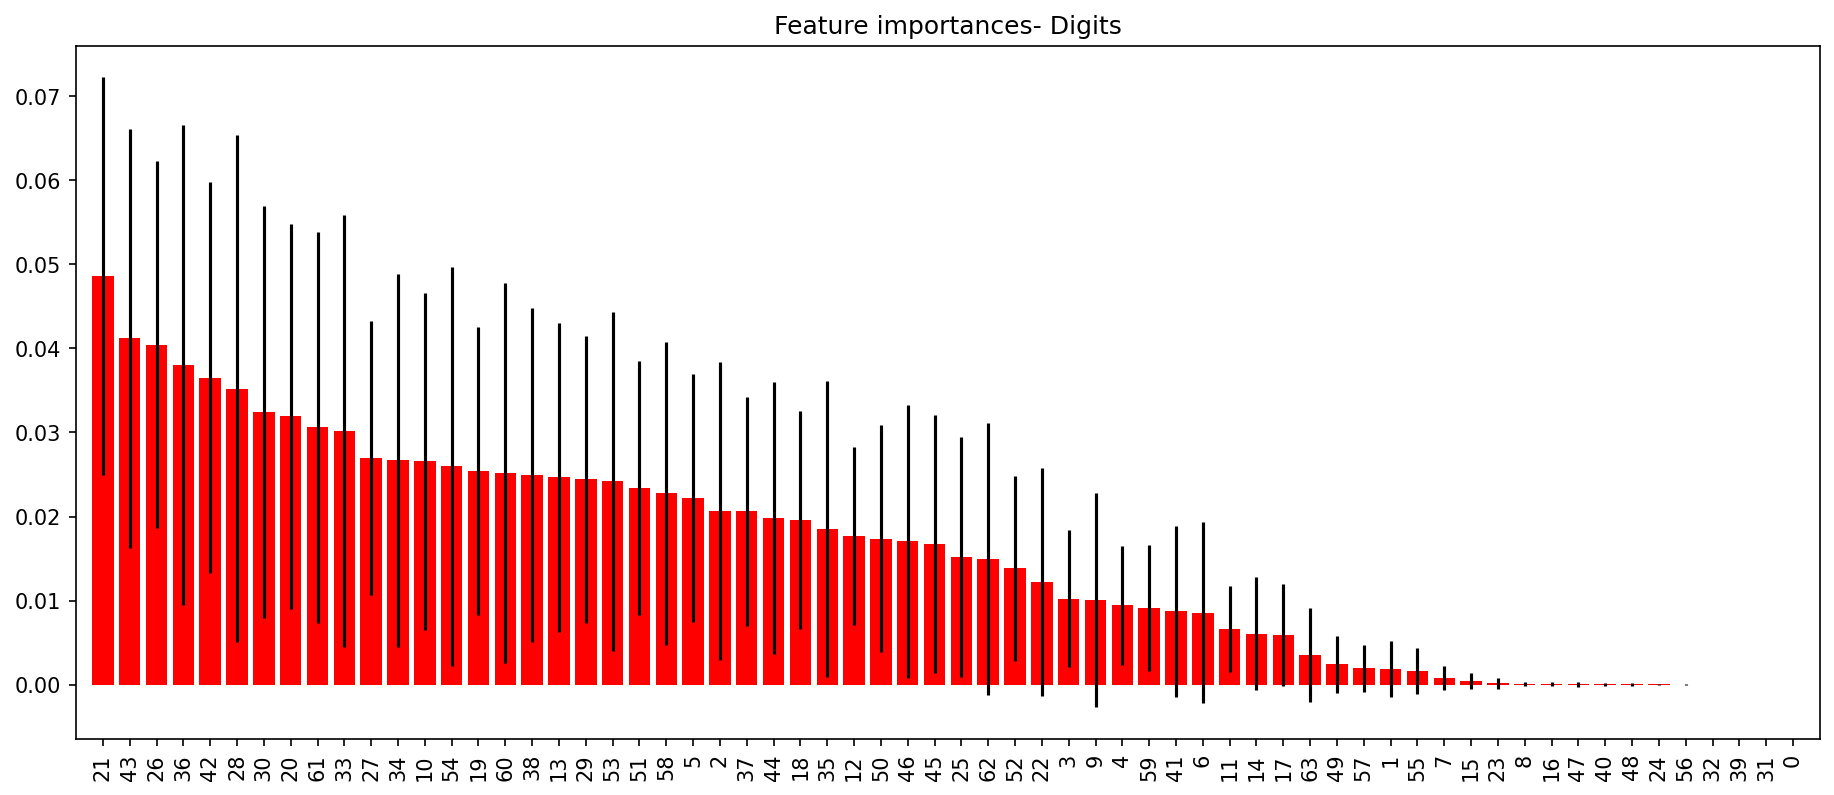

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
n_cols = 64
plt.figure( figsize = ( 15, 6), dpi = 150)
plt.title('Feature importances- Digits')
plt.bar(range(n_cols), importances[indices[:n_cols]], color = "r", yerr = std[indices[:n_cols]], align = "center")
plt.xticks(range(n_cols), indices[:n_cols])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlim([-1, n_cols])
plt.show()

In [43]:
np.mean(X, axis = 0)

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

In [44]:
np.mean(X, axis = 0).shape

(64,)

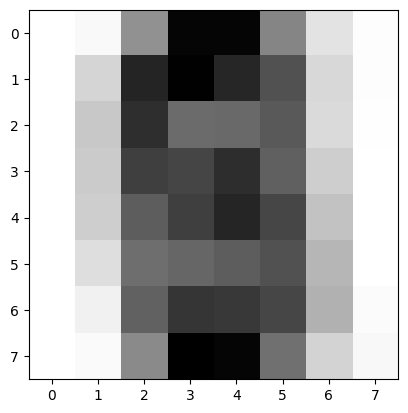

In [46]:
plt.imshow(np.mean(X, axis = 0).reshape(8,8) , cmap = plt.cm.binary)